In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from matplotlib.colors import ListedColormap

g = ['#006d2c', '#31a354', '#74c476']
cado = ['#bf812d', '#d9ef8b', '#1a9850']
green = sns.color_palette(cado)

In [2]:
df = pd.read_csv("avocado.csv", index_col=0, parse_dates=True, infer_datetime_format=True)

In [3]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [5]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  string 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  string 
 11  year          18249 non-null  Int64  
 12  region        18249 non-null  string 
dtypes: Int64(1), float64(9), string(3)
memory usage: 2.0 MB


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [7]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
cities = ['LosAngeles', 'NewYork',
       'DallasFtWorth', 'Houston', 
       'Denver', 'SanFrancisco', 'Chicago', 'Portland',
       'Seattle', 'Boston', 'SanDiego', 'Atlanta',
       'Sacramento', 'Philadelphia', 'Tampa', 'Detroit',
       'SouthCarolina', 'Orlando', 'LasVegas',     
       'Nashville', 'Charlotte',
       'StLouis', 'Indianapolis', 'GrandRapids', 'Columbus', 'Jacksonville',
       'Roanoke',  'Pittsburgh', 'Louisville', 'Albany',
       'Spokane', 'Boise', 'Syracuse']

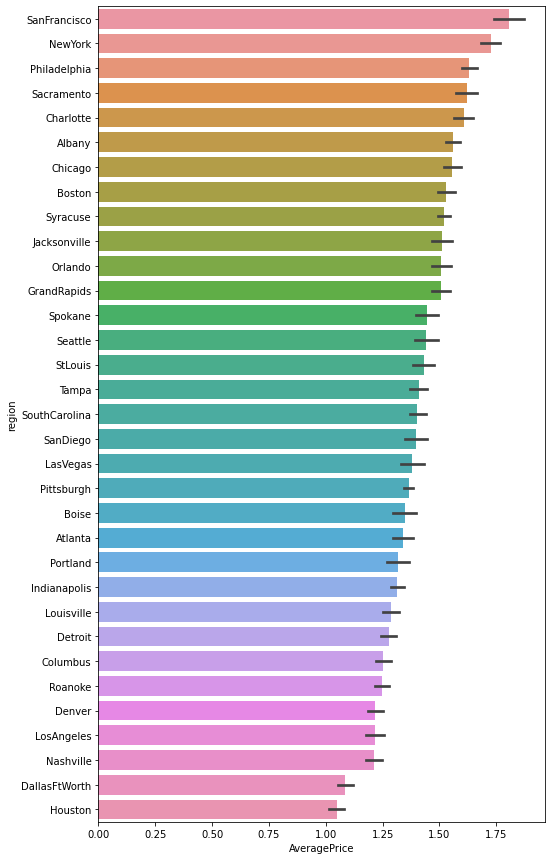

In [9]:
fig, ax = plt.subplots(figsize=(8,15))

order = df[df.region.isin(cities)].groupby('region').mean()['AveragePrice'].sort_values(ascending=False).index
sns.barplot(data=df[df.region.isin(cities)], y='region', x='AveragePrice',
#             hue='type',
            order=order,
            orient='h'
           )
plt.show()

### by PLU

In [10]:
plu_df = pd.melt(df[df.region.isin(cities)], id_vars=['region', 'year'], value_vars=['4046', '4225', '4770'])
plu_df['variable'] = plu_df['variable'].astype(int)
plu_df.head()

,region,year,variable,value
0,Albany,2015,4046,1036.74
1,Albany,2015,4046,674.28
2,Albany,2015,4046,794.70
3,Albany,2015,4046,1132.00
4,Albany,2015,4046,941.48


In [11]:
plu_df.groupby(['variable', 'year']).mean().reset_index()

,variable,year,value
0,4046,2015,87434.954548
1,4046,2016,72203.376524
2,4046,2017,79648.817244
3,4046,2018,94672.327298
4,4225,2015,98083.988628
5,4225,2016,91576.319703
6,4225,2017,82296.658305
7,4225,2018,97752.689015
8,4770,2015,8161.414382
9,4770,2016,9399.507212


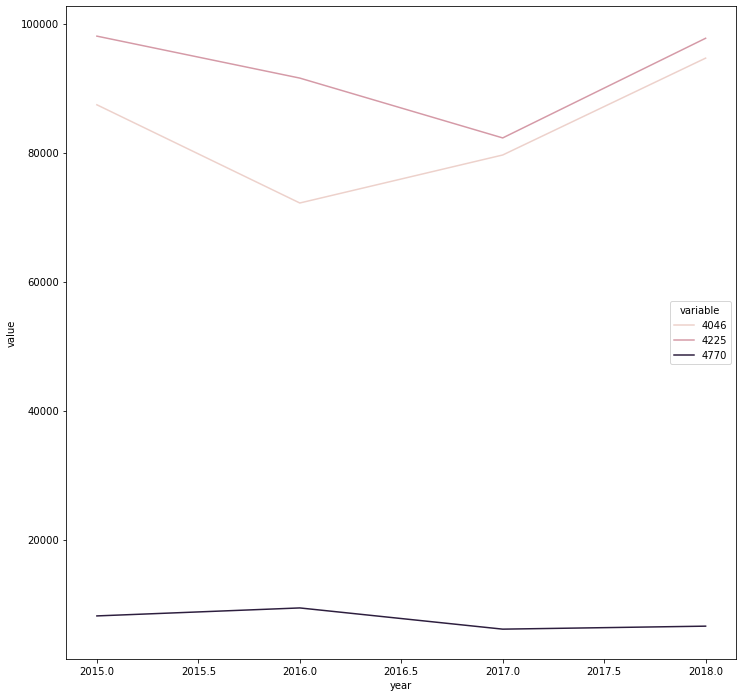

In [12]:
fig, ax = plt.subplots(figsize=(12,12))

sns.lineplot(data=plu_df.groupby(['variable', 'year']).mean().reset_index(), x='year', y='value', hue='variable', estimator=np.nanmean)
plt.show()

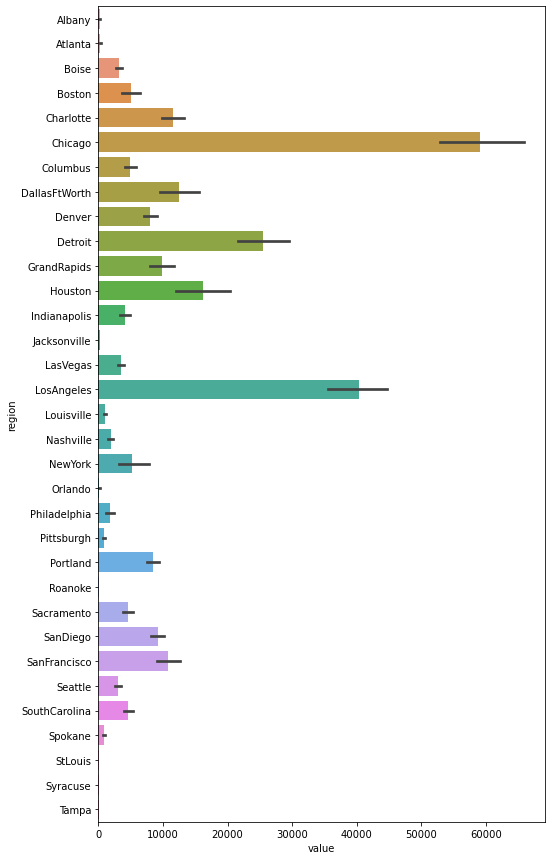

In [13]:
fig, ax = plt.subplots(figsize=(8,15))

# order = df[df.region.isin(cities)].groupby('region').mean()['AveragePrice'].sort_values(ascending=False).index
sns.barplot(data=plu_df[plu_df.variable==4770], y='region', x='value',
#             hue='type',
#             order=order,
            orient='h'
           )
plt.show()

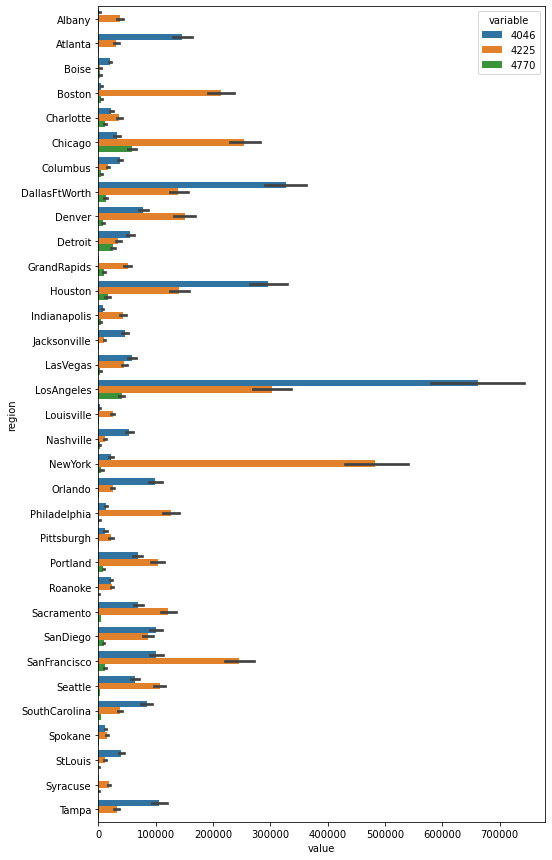

In [14]:
fig, ax = plt.subplots(figsize=(8,15))

# order = df[df.region.isin(cities)].groupby('region').mean()['AveragePrice'].sort_values(ascending=False).index
sns.barplot(data=plu_df, y='region', x='value',
            hue='variable',
#             order=order,
            orient='h',
#             stacked=True
           )
plt.show()

In [17]:
f = lambda x,y: x/y

In [18]:
cities_2016 = df[(df.region.isin(cities))&(df.year==2016)].groupby('region').mean()
cities_2016['sum'] = cities_2016[['4046', '4225', '4770']].apply(sum, axis=1)
cities_2016['4046_p'] = f(cities_2016['4046'], cities_2016['sum'])
cities_2016['4225_p'] = f(cities_2016['4225'], cities_2016['sum'])
cities_2016['4770_p'] = f(cities_2016['4770'], cities_2016['sum'])

In [19]:
city_order = cities_2016[['4770_p', '4225_p', '4046_p']].sort_values('4046_p', ascending=False).index.values

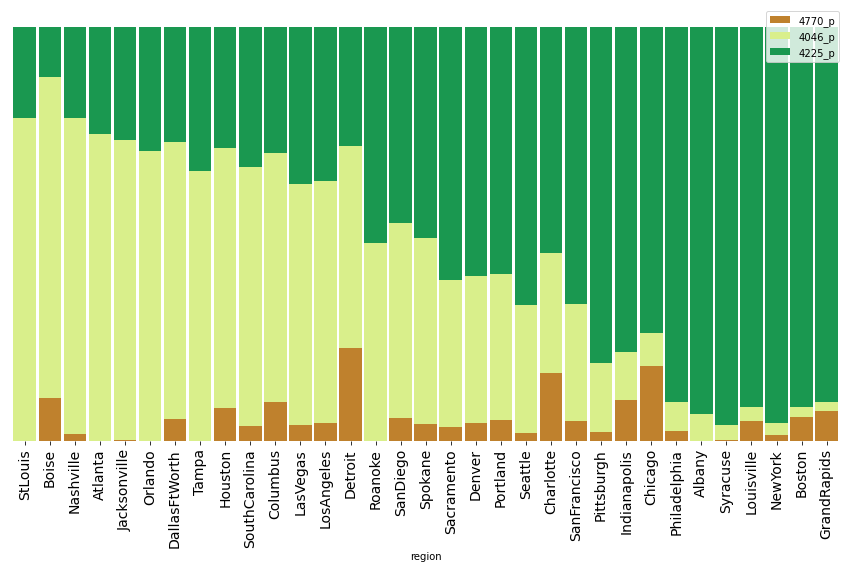

In [20]:
# fig, ax = plt.subplots()
ax = cities_2016[['4770_p','4046_p', '4225_p', ]].sort_values('4046_p', ascending=False).plot(kind='bar', stacked=True, colormap=ListedColormap(green),
                                                figsize=(15,8), fontsize=14, width=.9)
# plt.legend([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])

plt.show()

In [21]:
cities_2017 = df[(df.region.isin(cities))&(df.year==2017)].groupby('region').mean()

cities_2017['sum'] = cities_2017[['4046', '4225', '4770']].apply(sum, axis=1)

cities_2017['4046_p'] = f(cities_2017['4046'], cities_2017['sum'])
cities_2017['4225_p'] = f(cities_2017['4225'], cities_2017['sum'])
cities_2017['4770_p'] = f(cities_2017['4770'], cities_2017['sum'])

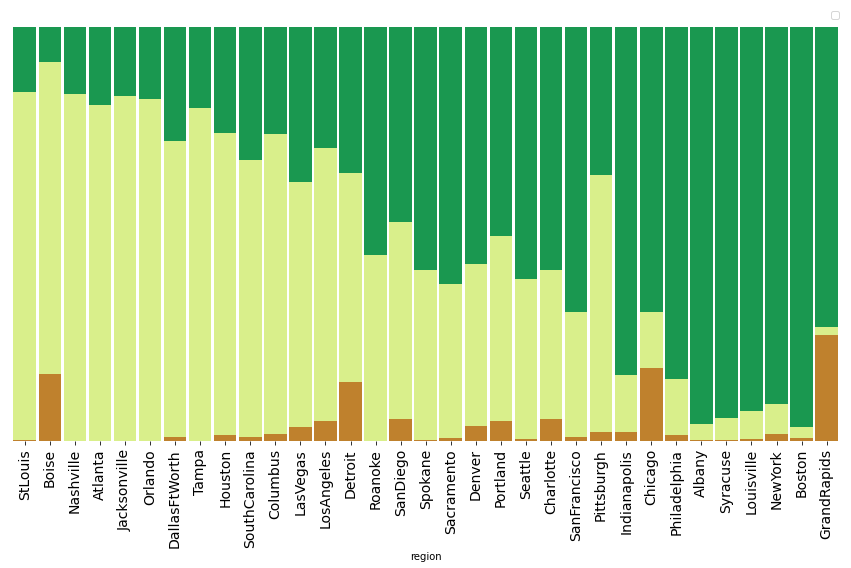

In [22]:
ax = cities_2017[['4770_p', '4046_p', '4225_p',]].loc[city_order].plot(kind='bar', stacked=True, colormap=ListedColormap(green),
                                                figsize=(15,8), fontsize=14, width=.9)
plt.legend([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])

plt.show()

In [23]:
cities_2018 = df[(df.region.isin(cities))&(df.year==2018)].groupby('region').mean()

cities_2018['sum'] = cities_2018[['4046', '4225', '4770']].apply(sum, axis=1)

cities_2018['4046_p'] = f(cities_2018['4046'], cities_2018['sum'])
cities_2018['4225_p'] = f(cities_2018['4225'], cities_2018['sum'])
cities_2018['4770_p'] = f(cities_2018['4770'], cities_2018['sum'])

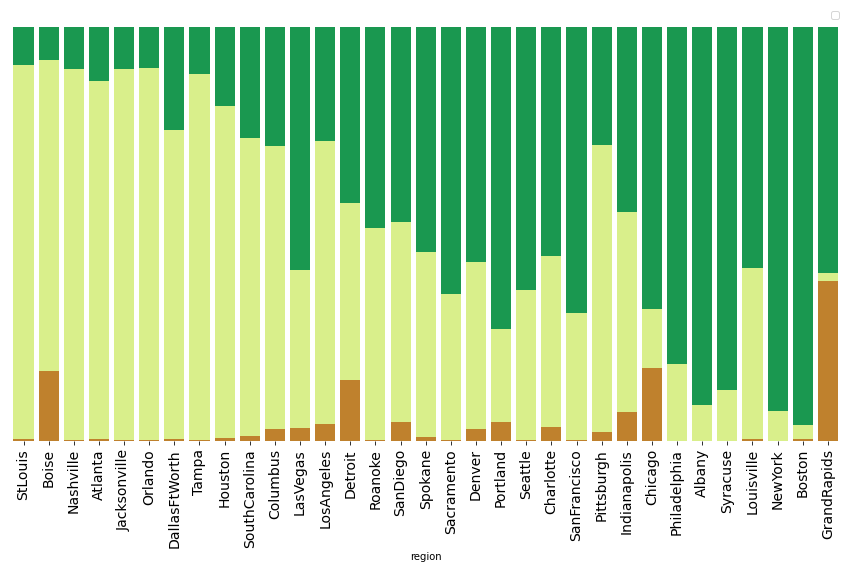

In [24]:
ax = cities_2018[['4770_p',  '4046_p','4225_p',]].loc[city_order].plot(kind='bar', stacked=True, colormap=ListedColormap(green),
                                                figsize=(15,8), fontsize=14, width=.8,)
plt.legend([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])

plt.show()

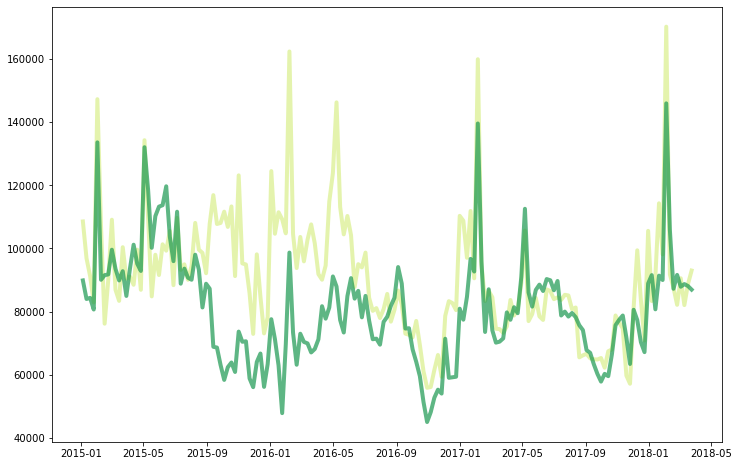

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
lw = 4
alpha=.7
colors = cado


# plt.plot(df[df.region.isin(cities)].set_index('Date')['4770'].sort_index().groupby('Date').mean(), lw=lw, alpha=alpha,
#         color=colors[0],)

plt.plot(df[df.region.isin(cities)].set_index('Date')['4225'].sort_index().groupby('Date').mean(), lw=lw, alpha=alpha,
        color=colors[1], ls='-')

plt.plot(df[df.region.isin(cities)].set_index('Date')['4046'].sort_index().groupby('Date').mean(), lw=lw, alpha=alpha,
        color=colors[2], ls='-')


plt.show()

In [291]:
plu_df.head()

,region,year,variable,value
0,Albany,2015,4046,1036.74
1,Albany,2015,4046,674.28
2,Albany,2015,4046,794.70
3,Albany,2015,4046,1132.00
4,Albany,2015,4046,941.48


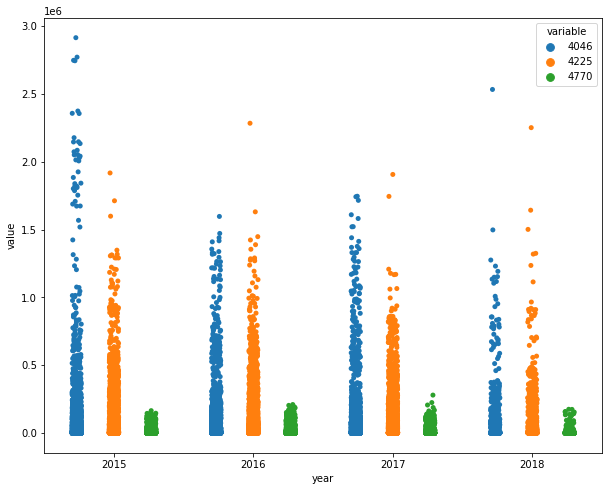

In [295]:
fig, ax = plt.subplots(figsize=(10,8))

sns.stripplot(data=plu_df, x='year', y='value', hue='variable', dodge=True)
plt.show()

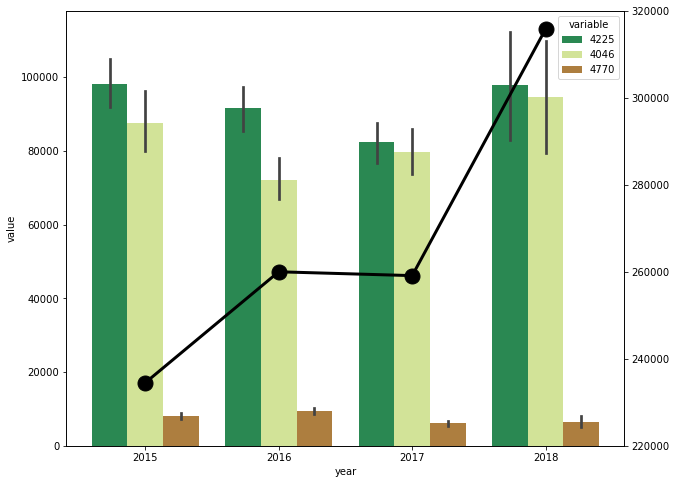

In [333]:
fig, ax = plt.subplots(figsize=(10,8))

sns.barplot(data=plu_df, x='year', y='value', hue='variable', dodge=True, palette=cado, hue_order=[4225, 4046, 4770], ax=ax)

# ax.axvline(0)
ax2 = ax.twinx()
ax2.plot([0,1,2,3], df[df.region.isin(cities)].groupby('year').mean()['Total Volume'].values, 
         color='k', lw=3, marker='o', ms=15)
ax2.set_ylim(220000,320000)


# sns.lineplot(data=df.groupby('year').mean(), x='year', y='Total Volume', ax=ax2)
plt.show()

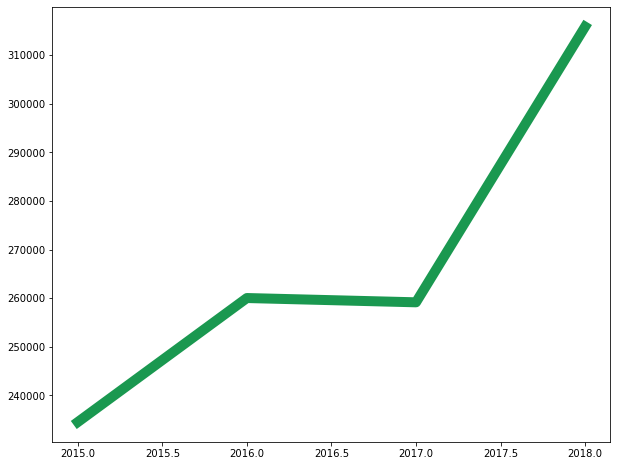

In [341]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot([2015, 2016, 2017, 2018], df[df.region.isin(cities)].groupby('year').mean()['Total Volume'].values, 
         color=cado[0], lw=10, ms=15)
# ax.set_ylim(0,320000)

plt.show()

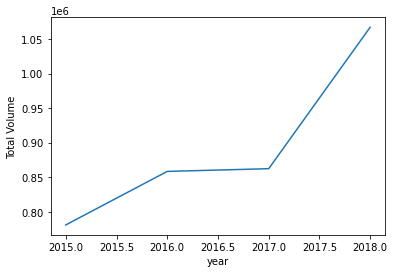

In [306]:
sns.lineplot(data=df.groupby('year').mean(), x='year', y='Total Volume')
plt.show()

In [321]:
df[df.region.isin(cities)].groupby('year').mean()['Total Volume'].values

array([234489.78321387, 260013.0590676 , 259132.73710406, 315864.11229798])

In [342]:
315864.11229798/234489.78321387

1.347027183738284

In [343]:
234489.78321387*1.35

316561.2073387245

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(data=df[['4770', '4225', '4046']], estimator=None)
plt.show()

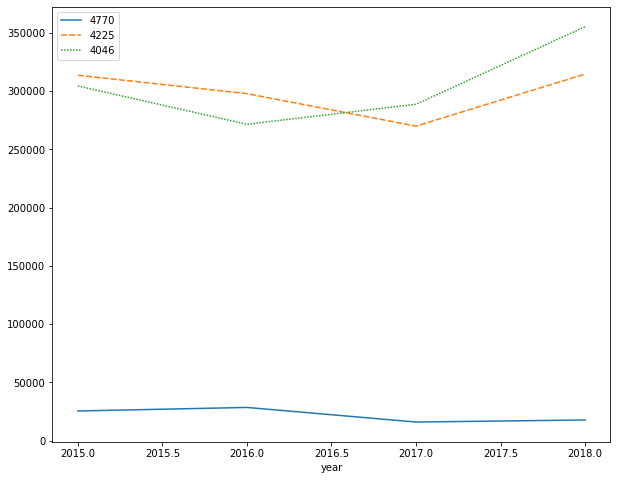

In [227]:
fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(data=df.groupby('year').mean()[['4770', '4225', '4046']], estimator=None)
plt.show()

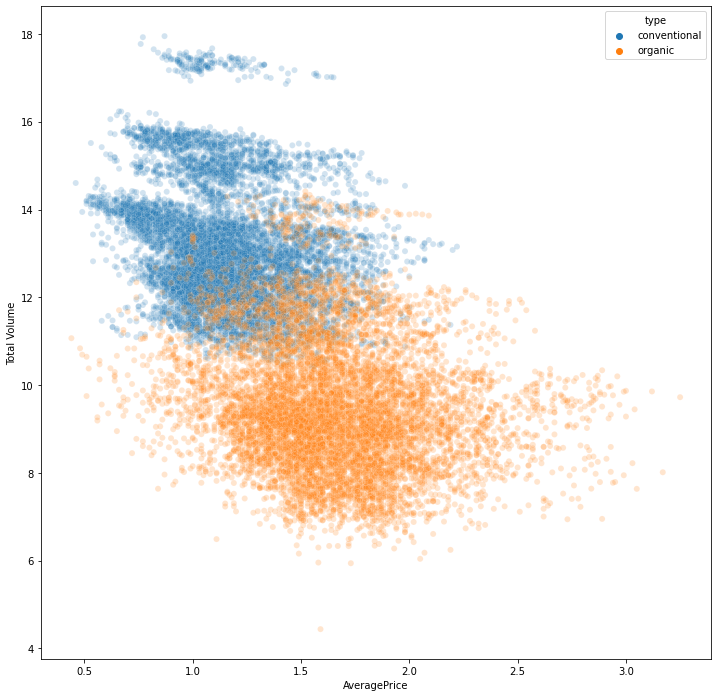

In [37]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(data=df,
           x='AveragePrice', y=np.log(df['Total Volume']),
           hue='type', alpha=.2)

plt.show()

In [13]:
df.type.unique()

<StringArray>
['conventional', 'organic']
Length: 2, dtype: string

In [14]:
df.Date.min()

Timestamp('2015-01-04 00:00:00')

In [15]:
df.Date.max()

Timestamp('2018-03-25 00:00:00')

In [16]:
df.region.unique()

<StringArray>
[             'Albany',             'Atlanta', 'BaltimoreWashington',
               'Boise',              'Boston',    'BuffaloRochester',
          'California',           'Charlotte',             'Chicago',
    'CincinnatiDayton',            'Columbus',       'DallasFtWorth',
              'Denver',             'Detroit',         'GrandRapids',
          'GreatLakes',  'HarrisburgScranton', 'HartfordSpringfield',
             'Houston',        'Indianapolis',        'Jacksonville',
            'LasVegas',          'LosAngeles',          'Louisville',
   'MiamiFtLauderdale',            'Midsouth',           'Nashville',
    'NewOrleansMobile',             'NewYork',           'Northeast',
  'NorthernNewEngland',             'Orlando',        'Philadelphia',
       'PhoenixTucson',          'Pittsburgh',              'Plains',
            'Portland',   'RaleighGreensboro',     'RichmondNorfolk',
             'Roanoke',          'Sacramento',            'SanDiego',
      

In [18]:
df[['year', 'AveragePrice', 'region']].groupby('region').count()['year']

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

In [19]:
df[['year', 'AveragePrice', 'region']].groupby('region').mean()['AveragePrice']

region
Albany                 1.561036
Atlanta                1.337959
BaltimoreWashington    1.534231
Boise                  1.348136
Boston                 1.530888
BuffaloRochester       1.516834
California             1.395325
Charlotte              1.606036
Chicago                1.556775
CincinnatiDayton       1.209201
Columbus               1.252781
DallasFtWorth          1.085592
Denver                 1.218580
Detroit                1.276095
GrandRapids            1.505000
GreatLakes             1.338550
HarrisburgScranton     1.513284
HartfordSpringfield    1.818639
Houston                1.047929
Indianapolis           1.313994
Jacksonville           1.510947
LasVegas               1.380917
LosAngeles             1.216006
Louisville             1.286686
MiamiFtLauderdale      1.428491
Midsouth               1.404763
Nashville              1.212101
NewOrleansMobile       1.304793
NewYork                1.727574
Northeast              1.601923
NorthernNewEngland     1.477396
O

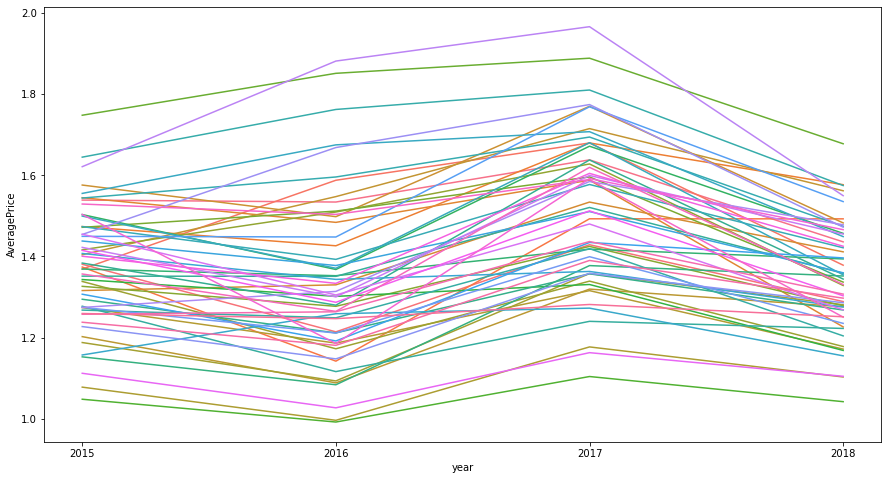

In [31]:
fig, ax = plt.subplots(figsize=(15,8))

sns.lineplot(data=df[['year', 'AveragePrice', 'region']].groupby(['region', 'year']).mean().reset_index(),
             x='year', y='AveragePrice', 
             hue='region', legend=False)

ax.set_xticks([2015, 2016, 2017, 2018])

plt.show()

In [23]:
df[['year', 'AveragePrice', 'region']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          18249 non-null  Int64  
 1   AveragePrice  18249 non-null  float64
 2   region        18249 non-null  string 
dtypes: Int64(1), float64(1), string(1)
memory usage: 588.1 KB


In [27]:
df[['year', 'AveragePrice', 'region']].groupby(['region', 'year']).mean().reset_index()

,region,year,AveragePrice
0,Albany,2015,1.538750
1,Albany,2016,1.533942
2,Albany,2017,1.637830
3,Albany,2018,1.435833
4,Atlanta,2015,1.380577
...,...,...,...
211,West,2018,1.297083
212,WestTexNewMexico,2015,1.259320
213,WestTexNewMexico,2016,1.246635
214,WestTexNewMexico,2017,1.281538


In [24]:
df[['year', 'AveragePrice', 'region']].describe()

,year,AveragePrice
count,18249.000000,18249.000000
mean,2016.147899,1.405978
std,0.939938,0.402677
min,2015.000000,0.440000
25%,2015.000000,1.100000
50%,2016.000000,1.370000
75%,2017.000000,1.660000
max,2018.000000,3.250000


In [50]:
west_coast = ['West', 'California', 'LosAngeles', 'SanFrancisco', 'Portland', 'Seattle', 'SanDiego', 'Spokane']

In [54]:
wc_df = df[df.region.isin(west_coast)]

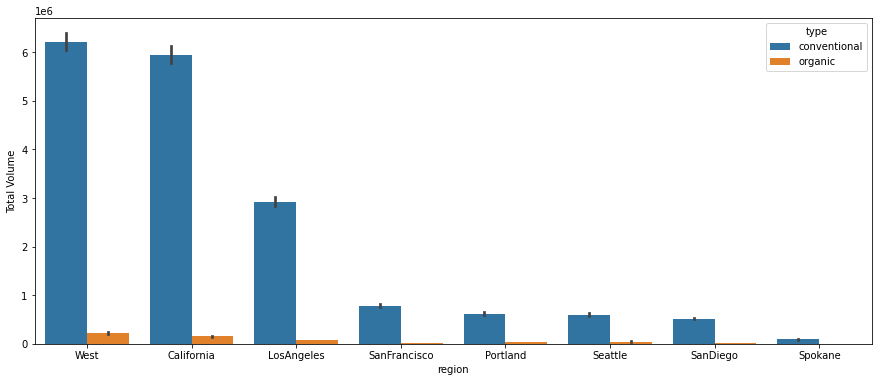

In [58]:
fig, ax = plt.subplots(figsize=(15,6))

order = wc_df.groupby('region').mean()['Total Volume'].sort_values(ascending=False).index
sns.barplot(data=wc_df, x='region', y='Total Volume',
            hue='type',
            order=order
           )
plt.show()

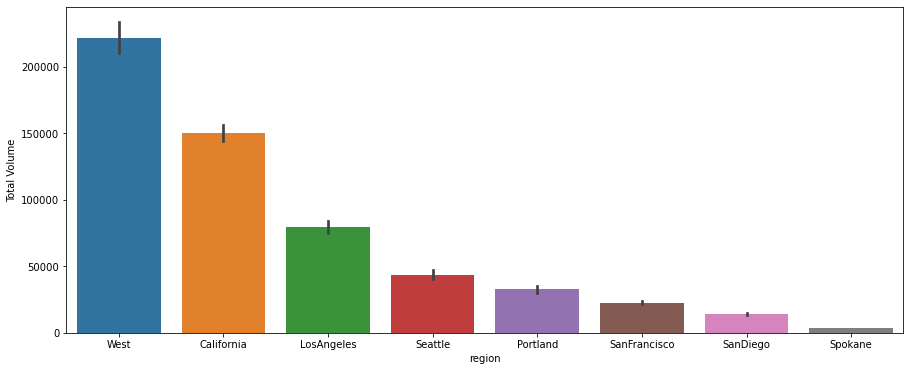

In [60]:
fig, ax = plt.subplots(figsize=(15,6))

order = wc_df[wc_df.type=='organic'].groupby('region').mean()['Total Volume'].sort_values(ascending=False).index
sns.barplot(data=wc_df[wc_df.type=='organic'], x='region', y='Total Volume',
#             hue='type',
            order=order
           )
plt.show()

In [61]:
wc_df[wc_df.type=='organic']

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.45,98576.63,14306.68,50893.97,0.00,33375.98,29507.45,3868.53,0.00,organic,2015,California
1,2015-12-20,1.35,99793.55,12746.47,48195.95,1.52,38849.61,25535.80,13313.81,0.00,organic,2015,California
2,2015-12-13,1.39,98605.40,13609.24,46518.56,3.05,38474.55,24359.79,14114.76,0.00,organic,2015,California
3,2015-12-06,1.48,91211.53,17839.96,47527.65,1.53,25842.39,25661.06,181.33,0.00,organic,2015,California
4,2015-11-29,1.75,83415.54,13195.19,48229.29,0.00,21991.06,21671.70,319.36,0.00,organic,2015,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
8,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
9,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
10,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West


In [64]:
seattle = df[df.region=="Seattle"].sort_values('Date')

seattle.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,0.97,634522.34,165839.16,341836.86,15291.36,111554.96,96695.27,14859.69,0.00,conventional,2015,Seattle
51,2015-01-04,1.49,33795.91,6821.76,20720.77,1.23,6252.15,452.73,5799.42,0.00,organic,2015,Seattle
50,2015-01-11,1.06,527350.82,144349.43,278069.43,18076.48,86855.48,81221.30,5632.65,1.53,conventional,2015,Seattle
50,2015-01-11,1.46,46687.01,8691.73,33361.78,13.48,4620.02,223.33,4396.69,0.00,organic,2015,Seattle
49,2015-01-18,1.20,463472.52,160898.14,223145.82,11177.67,68250.89,67519.53,720.65,10.71,conventional,2015,Seattle


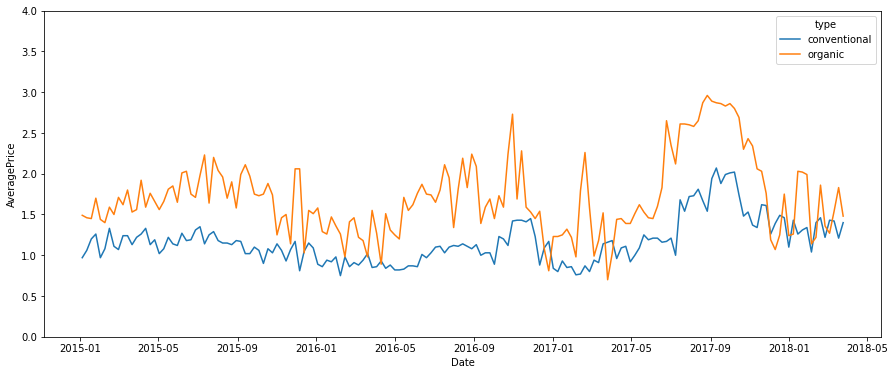

In [71]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=seattle, x='Date', y='AveragePrice', hue='type')
ax.set_ylim(0,4)
plt.show()


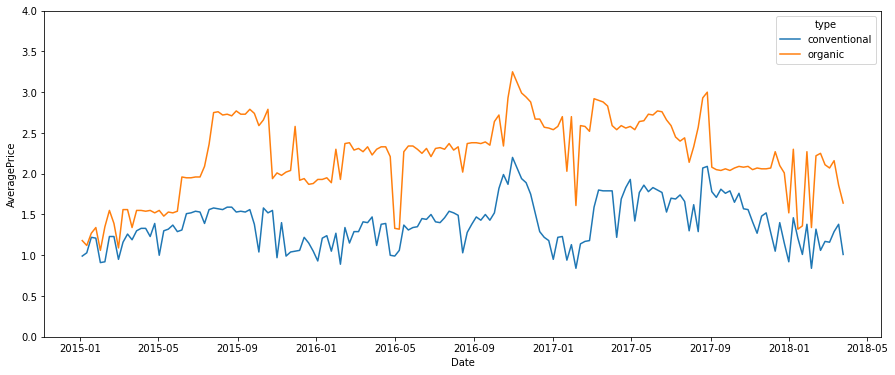

In [72]:
# sf = df[df.region=="SanFrancisco"].sort_values('Date')
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=sf, x='Date', y='AveragePrice', hue='type')
ax.set_ylim(0,4)
plt.show()

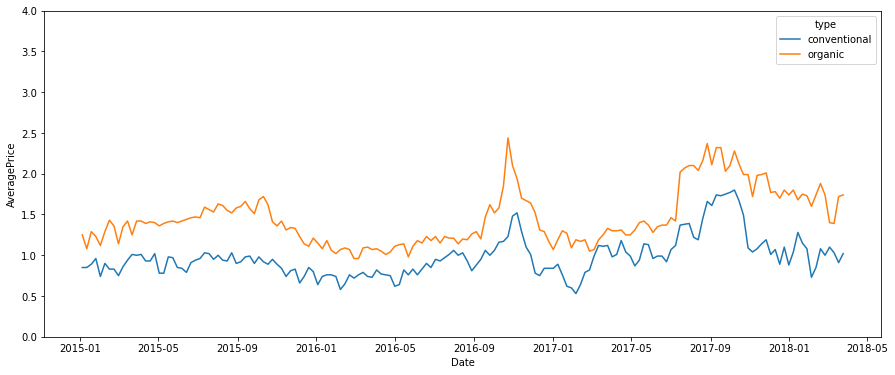

In [74]:
la = df[df.region=="LosAngeles"].sort_values('Date')
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=la, x='Date', y='AveragePrice', hue='type')
ax.set_ylim(0,4)
plt.show()

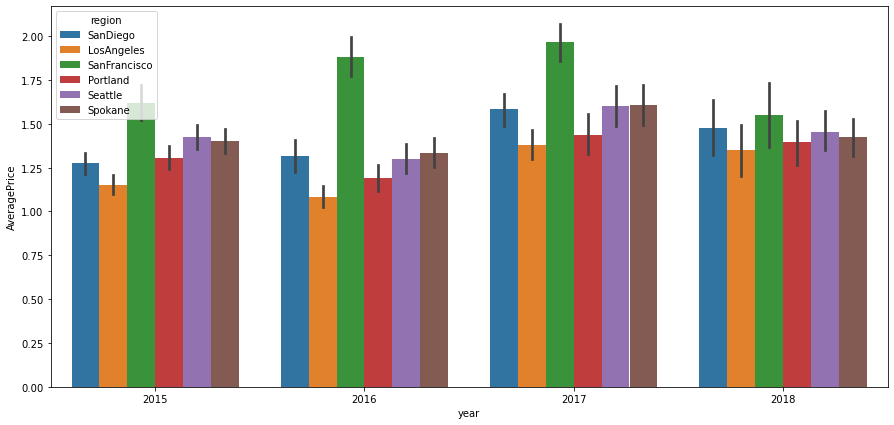

In [80]:
fig, ax = plt.subplots(figsize=(15,7))

sns.barplot(data=wc_df, x='year', y='AveragePrice', hue='region',
           hue_order=['SanDiego', 'LosAngeles', 'SanFrancisco', 'Portland', 'Seattle', 'Spokane'])

plt.show()

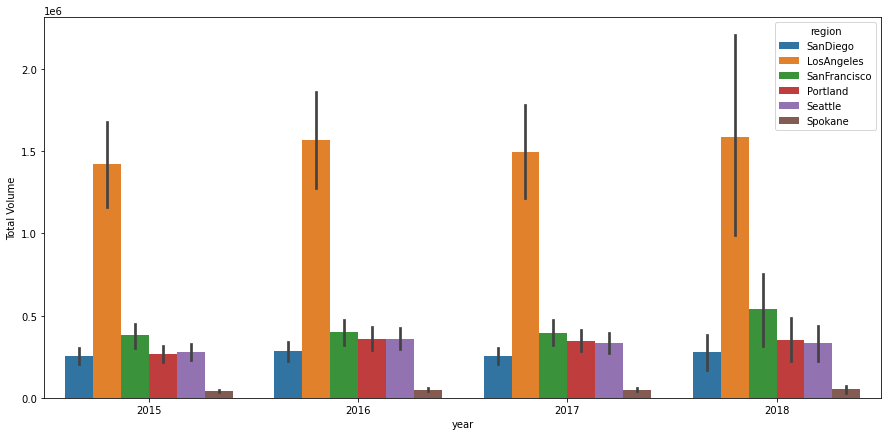

In [82]:
fig, ax = plt.subplots(figsize=(15,7))

sns.barplot(data=wc_df, x='year', y='Total Volume', hue='region',
           hue_order=['SanDiego', 'LosAngeles', 'SanFrancisco', 'Portland', 'Seattle', 'Spokane'])

plt.show()

In [87]:
la.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,LosAngeles
51,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,LosAngeles
50,2015-01-11,0.85,2713699.60,1786326.65,617233.39,58892.91,251246.65,222971.68,25111.74,3163.23,conventional,2015,LosAngeles
50,2015-01-11,1.08,60232.63,52087.31,2063.44,0.00,6081.88,6081.88,0.00,0.00,organic,2015,LosAngeles
49,2015-01-18,0.89,2800679.50,1925013.31,526106.80,59364.23,290195.16,260857.96,26671.18,2666.02,conventional,2015,LosAngeles


In [97]:
plu_la = la[la.type=='conventional'].pivot(index='Date', columns='region', values=['4046', '4225', '4770'])

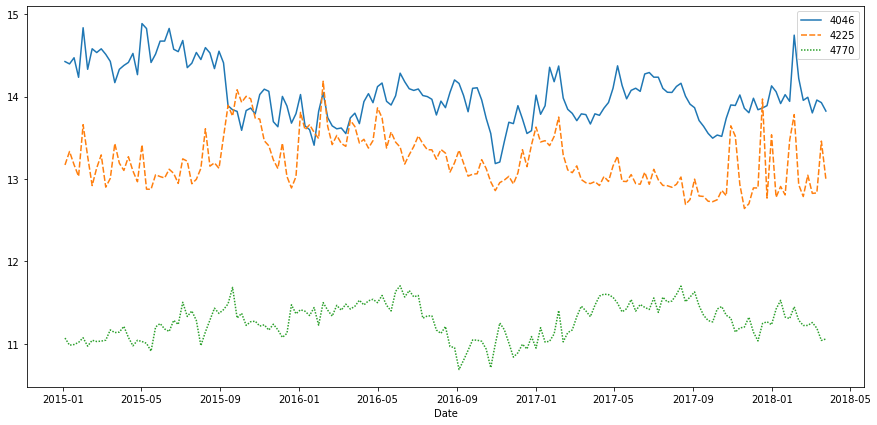

In [100]:
fig, ax = plt.subplots(figsize=(15,7))

sns.lineplot(data=np.log(plu_la))
plt.show()

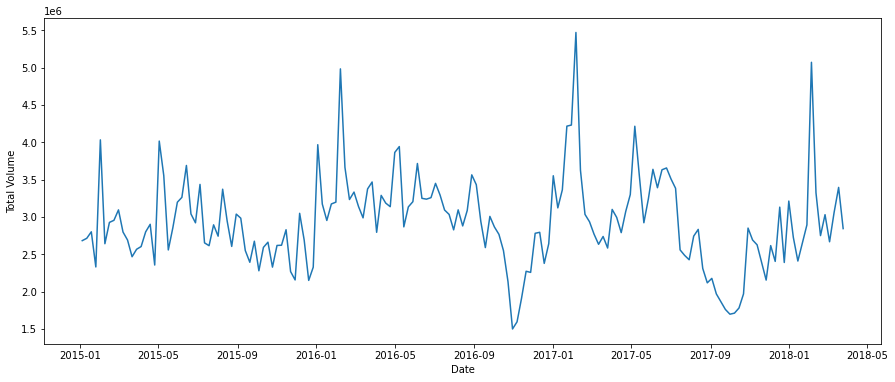

In [86]:
la = df[df.region=="LosAngeles"].sort_values('Date')
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=la[la.type=='conventional'], x='Date', y='Total Volume')
# ax.set_ylim(0,4)
plt.show()